In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./input/playground-series-s3e2/train.csv')
test = pd.read_csv('./input/playground-series-s3e2/test.csv')
submission = pd.read_csv('./input/playground-series-s3e2/sample_submission.csv')
train.shape, test.shape, submission.shape

((15304, 12), (10204, 11), (10204, 2))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB


In [5]:
train.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0


In [6]:
check = train.drop('id',axis=1).copy()
check['hypertension'].replace([0,1], ['No','Yes'], inplace=True)
check['heart_disease'].replace([0,1], ['No','Yes'], inplace=True)
# num_cols = ['age','avg_glucose_level','bmi']
# bool_cols = ['hypertension','heart_disease','ever_married']
# cat_cols = ['gender','work_type','Residence_type','smoking_status']

In [7]:
num = check.describe()
num_cols = list(num.drop('stroke',axis=1).columns)
num

,age,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,89.039853,28.112721,0.041296
std,21.444673,25.476102,6.722315,0.198981
min,0.080000,55.220000,10.300000,0.000000
25%,26.000000,74.900000,23.500000,0.000000
50%,43.000000,85.120000,27.600000,0.000000
75%,57.000000,96.980000,32.000000,0.000000
max,82.000000,267.600000,80.100000,1.000000


In [8]:
cat = check.describe(include=['O'])
cat_cols = list(cat.columns)
cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304,15304,15304
unique,3,2,2,2,5,2,4
top,Female,No,No,Yes,Private,Rural,never smoked
freq,9446,14543,14947,10385,9752,7664,6281


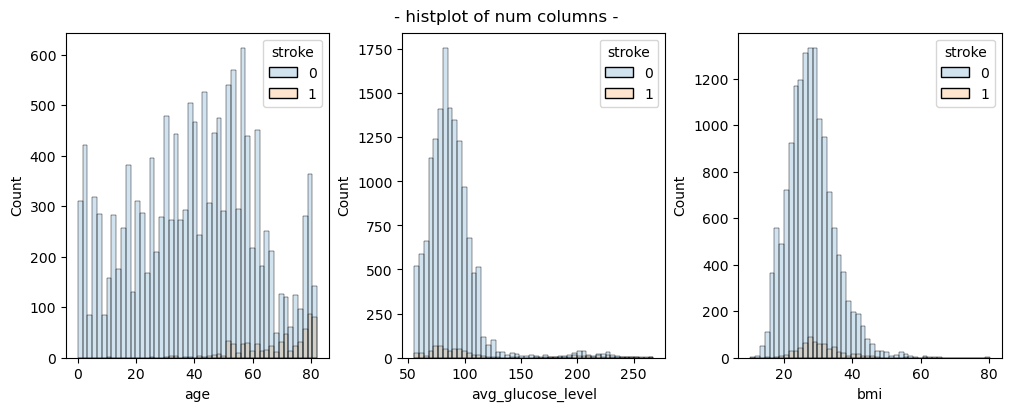

In [9]:
fig, ax = plt.subplots(1,3, figsize=(10,4), constrained_layout=True)
for i,col in enumerate(num_cols):
    sns.histplot(data=check, x=col, hue='stroke', bins=50, alpha=0.2, ax=ax[i])
fig.suptitle('- histplot of num columns -')
plt.show()

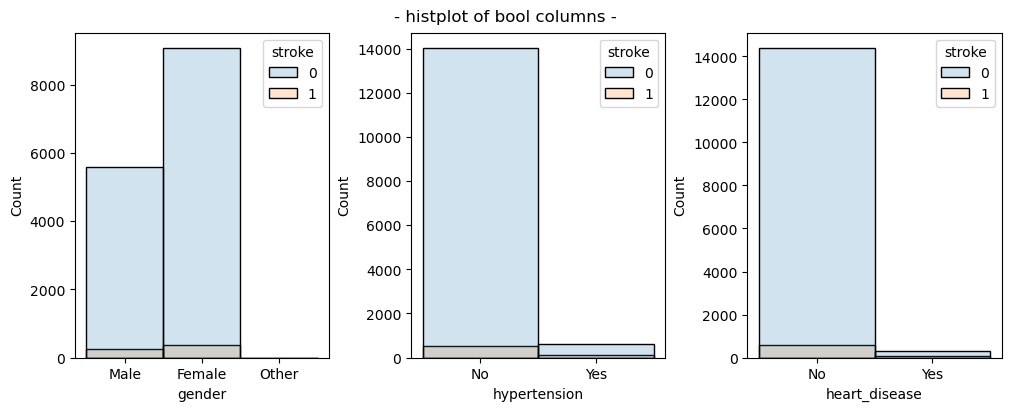

In [10]:
fig, ax = plt.subplots(1,3, figsize=(10,4), constrained_layout=True)
for i,col in enumerate(cat_cols[:3]):
    sns.histplot(data=check, x=col, hue='stroke', bins=2, alpha=0.2, ax=ax[i], binwidth=0.5)
fig.suptitle('- histplot of bool columns -')
plt.show()

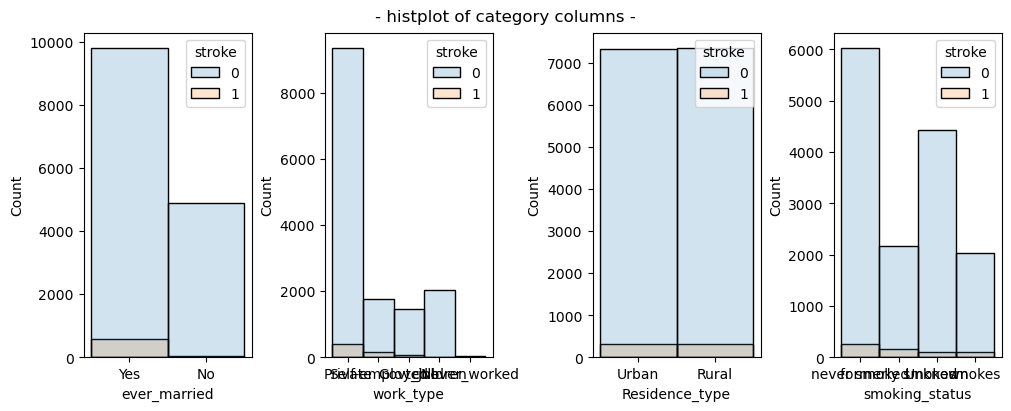

In [11]:
fig, ax = plt.subplots(1,4, figsize=(10,4), constrained_layout=True)
for i,col in enumerate(cat_cols[3:]):
    sns.histplot(data=check, x=col, hue='stroke', alpha=0.2, ax=ax[i])
fig.suptitle('- histplot of category columns -')
plt.show()

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

class myFitTrans(BaseEstimator, TransformerMixin):
    def __init__(self, gend_trans=False, smoke_trans=False, 
                 agebmi=False, bmiprime=False, obesity=False, blood=False):
        self.gend_trans = gend_trans
        self.smoke_trans = smoke_trans
        self.agebmi = agebmi; self.bmiprime = bmiprime
        self.obesity = obesity; self.blood = blood
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.gend_trans:
            X['gender'].replace(['Other'], 
                                list(check['gender'].mode()), inplace=True)
        if self.smoke_trans:
            X['smoking_status'].replace(['Unknown'],['never smoked'])
        if self.agebmi:
            X['age/bmi'] = X['age']/X['bmi']
            X['age*bmi'] = X['age']*X['bmi']
        if self.bmiprime:
            X['bmi/prime'] = X['bmi']/25
        if self.obesity:
            X['obesity'] = X['avg_glucose_level']*X['bmi']/1000
        if self.blood:
            X['blood_heart'] = X['hypertension']*X['heart_disease']
        return X

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
pipe = Pipeline([('myTrans', myFitTrans()),
                 ('onehot', ColumnTransformer([
                            ('cat', OneHotEncoder(drop='if_binary'), cat_cols)
                            ], remainder='passthrough'))
                 ])

In [91]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [101]:
# check
from sklearn.model_selection import GridSearchCV
check_pipe = Pipeline([('ori_pipe', pipe),
                       ('gboost', GradientBoostingClassifier())])
checkSearch = GridSearchCV(check_pipe, param_grid={
                    'ori_pipe__myTrans__gend_trans' : [True, False],
                    'ori_pipe__myTrans__smoke_trans' :  [True, False],
                    'ori_pipe__myTrans__agebmi' :  [True, False],
                    'ori_pipe__myTrans__bmiprime' :  [True, False],
                    'ori_pipe__myTrans__obesity' :  [True, False],
                    'ori_pipe__myTrans__blood' :  [True, False]},
                n_jobs=-1, cv=5, scoring='roc_auc', return_train_score=True)
checkSearch.fit(train.drop(columns=['id','stroke']), train['stroke'].copy())
checkSearch.best_params_, checkSearch.best_score_

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.8840127  0.88406058 0.88507726 0.88509097        nan        nan
        nan        nan 0.8840369  0.88405411 0.88512218 0.88511638
        nan        nan        nan        nan 0.88402647 0.88404222
 0.88523377 0.88537844        nan        nan        nan        nan
 0.88406581 0.88396662 0.88533333 0.88539021        nan        nan
        nan        nan 0.88495333 0.88497217 0.88453793 0.88461219
        nan        nan        nan        nan 0.88493269 0.88495925
 0.88456441 0.88460887        nan        nan        nan        nan
 0.88468324 0.88464059 0.88568153 0.88570321        nan        nan
        nan        nan 0.88465527 0.88463319 0.88575729 0.88570867
        nan        nan        nan        nan]
  warnings.warn(


({'ori_pipe__myTrans__agebmi': False,
  'ori_pipe__myTrans__blood': False,
  'ori_pipe__myTrans__bmiprime': False,
  'ori_pipe__myTrans__gend_trans': True,
  'ori_pipe__myTrans__obesity': False,
  'ori_pipe__myTrans__smoke_trans': True},
 0.8857572936302944)

In [50]:
setpipe = checkSearch.best_estimator_[:-1]

In [62]:
X = setpipe.fit_transform(train.drop(columns=['id','stroke']))
y = train['stroke'].copy()
scoring = 'roc_auc'
cv = 5
score = {}

In [61]:
models = ['svc','gp','nb','bag','tree','rndF', # 'knn','vote',
          'adaB','gboost','Hgboost','stack','mlp', 'xgb'] 
svc = SVC()
# knn = KNeighborsClassifier()
gp = GaussianProcessClassifier()
nb = GaussianNB()
bag = BaggingClassifier()
tree = DecisionTreeClassifier()
rndF = RandomForestClassifier()
adaB = AdaBoostClassifier()
gboost = GradientBoostingClassifier()
Hgboost = HistGradientBoostingClassifier()
# vote = VotingClassifier(estimators=[('svc',svc),('nb',nb),('tree',tree),('rndF',rndF)], 
#                         voting='soft')
stack = StackingClassifier(estimators=[('svc',svc),('nb',nb),('tree',tree),('rndF',rndF)])
mlp = MLPClassifier()
xgb = XGBClassifier()

In [63]:
for model in models:
    if model=='gp' or model=='stack': continue
    score[model] = cross_validate(eval(model), X, y, cv=cv, scoring=scoring)
    print(model,'complete')

svc complete
nb complete
bag complete
tree complete
rndF complete
adaB complete
gboost complete
Hgboost complete
mlp complete
xgb complete


In [64]:
for k,v in score.items():
    print('- {0:<14}|'.format(k), 
          'time:',round(sum(v['fit_time'])+sum(v['score_time']),3), end=' ')
    print('| 평균:', round(v['test_score'].mean(),3))

- svc           | time: 3.731 | 평균: 0.497
- nb            | time: 0.031 | 평균: 0.833
- bag           | time: 1.173 | 평균: 0.779
- tree          | time: 0.143 | 평균: 0.591
- rndF          | time: 4.272 | 평균: 0.848
- adaB          | time: 1.794 | 평균: 0.883
- gboost        | time: 5.295 | 평균: 0.886
- Hgboost       | time: 1.039 | 평균: 0.876
- mlp           | time: 9.976 | 평균: 0.869
- xgb           | time: 1.546 | 평균: 0.863


**roc_auc**
|(onehot)|time|평균|(+gender)|time |평균|(+smoke)|time|평균
|:---|---:|---:|:---|---:|---:|:---|---:|---:|
|svc           | 3.76 |  0.659       ||   3.594 |   0.497||3.636 | 0.497
|knn           | 0.055 | nan         || |||||
|gp            | 970.667 |  0.72     ||   979.088 |   0.721|||
|nb            | 0.063 |  0.832      ||  0.031 |  0.833||0.031 | 0.833
|bag           | 1.204 |  0.765      ||   1.222 |  0.778||1.134 | 0.767
|tree          | 0.156 |  0.585      ||   0.15 |  0.579||0.173 | 0.593
|rndF          | 3.833 |  0.843      ||    4.097 |  0.848||4.095 | 0.847
|adaB          |  1.661 |  0.883     ||   1.677 |  0.883||1.689 | 0.883
|gboost        |  5.271 |  0.886     ||   5.174 |  0.886||5.253 | 0.886
|Hgboost       |  0.996 |  0.879     ||   1.071 |  0.877||1.021 | 0.876
|vote          |  6.253 |  nan       || |||||
|stack         |  36.765 |  0.856    ||   37.71 | 0.862||39.389 | 0.86
|mlp           |  13.2 |  0.878      ||   12.255 | 0.871||9.277 | 0.87
|xgb|||||||1.546 | 0.863

In [ ]:
# => adaB, gboost, Hgboost

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[10,30,50,70],
               'learning_rate':[0.5,1,2,5],
               'algorithm':['SAMME','SAMME.R']}]
adaB_gs = GridSearchCV(adaB, param_grid, cv=cv, n_jobs=-1, 
                       scoring=scoring, return_train_score=True)
adaB_gs.fit(X,y)
adaB_gs.best_params_, adaB_gs.best_score_

({'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50},
 0.8857168576170233)

In [106]:
param_grid = [{'learning_rate':[0.05,0.1,0.5],
               'n_estimators':[30,50,80,100]}]
gboost_gs = GridSearchCV(gboost, param_grid, cv=cv, n_jobs=-1, 
                       scoring=scoring, return_train_score=True)
gboost_gs.fit(X,y)
gboost_gs.best_params_, gboost_gs.best_score_

({'learning_rate': 0.1, 'n_estimators': 50}, 0.88578558115034)

In [107]:
param_grid = [{'learning_rate':[0.05,0.1,0.5],
               'max_iter':[30,50,80,100]}]
Hgboost_gs = GridSearchCV(Hgboost, param_grid, cv=cv, n_jobs=-1, 
                       scoring=scoring, return_train_score=True)
Hgboost_gs.fit(X,y)
Hgboost_gs.best_params_, Hgboost_gs.best_score_

({'learning_rate': 0.05, 'max_iter': 30}, 0.8801171528367547)

In [108]:
gs_li = ['adaB_gs', 'gboost_gs', 'Hgboost_gs']
best_score = 0; best_model = ''
for gs in gs_li:
    print('-'*10, gs, '-'*10)
    print(eval(gs).best_params_)
    print('score:', round(eval(gs).best_score_,3))
    if best_score<=eval(gs).best_score_:
        best_score = eval(gs).best_score_
        best_model = gs
print('\nbest model:',best_model)

---------- adaB_gs ----------
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50}
score: 0.886
---------- gboost_gs ----------
{'learning_rate': 0.1, 'n_estimators': 50}
score: 0.886
---------- Hgboost_gs ----------
{'learning_rate': 0.05, 'max_iter': 30}
score: 0.88

best model: gboost_gs


In [109]:
test_X = setpipe.fit_transform(test.drop(columns=['id']))
pred = eval(best_model).predict(test_X)
submission['stroke'] = pred
submission.head(3)

,id,stroke
0,15304,0
1,15305,0
2,15306,0


In [110]:
ver = '1'
submission.to_csv('./output/submission_PGs3e2_{}.csv'.format(ver), index=False)

- ver1: 0.52071 +smoke, gboost(learning_rate=0.1,n_estimators=50)

In [112]:
# gend_trans=False,smoke_trans=False,agebmi=False,bmiprime=False,obesity=False,blood=False
true_pipe = Pipeline([('myTrans', myFitTrans(True,True,True,True,True,True)),
                      ('onehot', ColumnTransformer([
                                 ('cat', OneHotEncoder(drop='if_binary'), cat_cols)
                                 ], remainder='passthrough')),
                      ('gboost', GradientBoostingClassifier())])
param_grid = [{'gboost__learning_rate':[0.05,0.1,0.5],
               'gboost__n_estimators':[30,50,80,100]}]
gboost_gs2 = GridSearchCV(true_pipe, param_grid, cv=cv, n_jobs=-1, 
                       scoring=scoring, return_train_score=True)
gboost_gs2.fit(train.drop(columns=['id','stroke']), train['stroke'].copy())
gboost_gs2.best_params_, gboost_gs2.best_score_

({'gboost__learning_rate': 0.05, 'gboost__n_estimators': 100},
 0.8842716411334628)

In [114]:
pred = gboost_gs2.predict(test.drop(columns=['id']))
submission['stroke'] = pred
ver = '2'
submission.to_csv('./output/submission_PGs3e2_{}.csv'.format(ver), index=False)

- ver2: 0.524 +addcols, gboost(learning_rate=0.05,n_estimators=100)

In [ ]:
# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
# class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
# class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
# class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
# class sklearn.gaussian_process.GaussianProcessClassifier(kernel=None, *, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, max_iter_predict=100, warm_start=False, copy_X_train=True, random_state=None, multi_class='one_vs_rest', n_jobs=None)
# ? class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)[source]
# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
# class sklearn.ensemble.BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0, base_estimator='deprecated')
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
# class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
# class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
# class sklearn.ensemble.HistGradientBoostingClassifier(loss='log_loss', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None, class_weight=None)
# class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
# class sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, *, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)
# class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
